## Auto MPG Data Set
- https://archive.ics.uci.edu/ml/datasets/Auto+MPG
- The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
- This is a regression problem where we aim to predict the output of a continuous value, ie fuel efficiency.

## Steps perfomed in this SAS notebook:
- Importing Raw Data Files
- Check Data Types of Variables
- Check for Missing Data
- Handle Missing Values
- Check for Duplicate Entries
- Check for Outliers
- Check for Normal Distribution of Variables
- Handle Outliers using Multiple Linear Regression (Pending)
- Check Correlation between Variables
- Log Transformation (Pending)
- Feature Construction: Extracting name of the brand (Pending)
- Final Visualizations (Pending)

## Importing Raw Data Files

In [3]:
libname auto '/folders/myfolders/Project';

proc import Datafile= "~/Project/auto_mpg.csv"
out= auto.original
dbms=csv
replace;
run;

* Ignore error in data import. It is beacuse of '?' values in Horsepower variable;
proc print data= auto.original;
run;

Obs,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11,70,1,plymouth satellite
4,16,8,304,150,3433,12,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10,70,1,ford galaxie 500
7,14,8,454,220,4354,9,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10,70,1,pontiac catalina
10,15,8,390,190,3850,8.5,70,1,amc ambassador dpl


## Check Data Types of Variables

In [2]:
proc contents data= auto.original varname;
run;

## Check for Missing Data

In [3]:
proc means data=auto.original n nmiss;
run;
* Output shows 6 missing values in horsepower variable;

Variable,N,N Miss
mpg cylinders displacement horsepower weight acceleration model_year origin,398 398 398 392 398 398 398 398,0 0 0 6 0 0 0 0


In [4]:
proc format;
value $car
' ' = 'Missing'
other = 'Non Missing';

proc freq data=auto.original;
tables _character_ /nocum missing;
format _character_ $car.;
run;

*Output shows no missing values in character variables;

car_name,Frequency,Percent
Non Missing,398,100.00


In [5]:
*Print the row number for which data is missing in horsepower;
data _null_;
set auto.original;
file print;
if horsepower eq '?' then put
_n_= horsepower=;
run;

In [6]:
proc means data=auto.original mean median;
var horsepower;
run;

## Handle Missing Values

In [7]:
data auto.updated;
set auto.original;
*Replacing missing values with median value of horsepower variable;
if horsepower eq '?' then horsepower=93.5; 
run;

* Re-check if there are any missing values now;
proc means data=auto.updated n nmiss;
var horsepower;
run;

## Check for Duplicate Entries

In [8]:
proc sort data=auto.updated out=auto.temp3 noduprecs;
by mpg;
run;

*Log shows 0 duplicates were deleted. So all observations are unique;

## Check for Outliers

In [9]:
ods output TrimmedMeans=auto.trimmed (keep= Varname mean stdmean df);

*Triming 0.5% values from the top and bottom of the data;
proc univariate data = auto.updated trim=0.05 nextrobs=10;
run;

ods output close;

proc print data=auto.trimmed;
run;

In [10]:
*Restructuring the dataset;
data auto.temp;
set auto.updated;
array vars[*] _numeric_;
length VarName $ 32;
do i=1 to dim(vars);
    Varname=vname(vars[i]);
    Value=vars[i];
    output;
end;
keep Varname Value;
run;

proc print data=auto.temp (obs=10);
run;

Obs,VarName,Value
1,mpg,18
2,cylinders,8
3,displacement,307
4,horsepower,130
5,weight,3504
6,acceleration,12
7,model_year,70
8,origin,1
9,mpg,15
10,cylinders,8


In [11]:
proc sort data=auto.temp;
by varname;
run;

proc sort data=auto.trimmed;
by varname;
run;

data auto.outlier;
merge auto.temp auto.trimmed;
by varname;

std_dev=stdmean*sqrt(df+1);

* Checking values 3 Standard Deviation away from the mean;
if value lt mean-3*std_dev then do;
reason='Low';
output;
end;

else if value gt mean+3*std_dev then do;
reason='High';
output;
end;
run;

* Print the outlier values and the reason;
proc print data=auto.outlier;
var varname value reason;
run;


Obs,VarName,Value,reason
1,acceleration,23.5,Hig
2,acceleration,24.8,Hig
3,acceleration,23.7,Hig
4,acceleration,24.6,Hig
5,horsepower,220.0,Hig
6,horsepower,215.0,Hig
7,horsepower,225.0,Hig
8,horsepower,225.0,Hig
9,horsepower,215.0,Hig
10,horsepower,215.0,Hig


In [12]:
data auto.outlier;
merge auto.temp auto.trimmed;
by varname;

std_dev=stdmean*sqrt(df+1);

* Checking values 2 Standard Deviation away from the mean;
if value lt mean-2*std_dev then do;
reason='Low';
output;
end;

else if value gt mean+2*std_dev then do;
reason='High';
output;
end;
run;

proc print data=auto.outlier;
var varname value reason;
run;

Obs,VarName,Value,reason
1,acceleration,10.0,Low
2,acceleration,9.0,Low
3,acceleration,8.5,Low
4,acceleration,10.0,Low
5,acceleration,8.5,Low
6,acceleration,10.0,Low
7,acceleration,8.0,Low
8,acceleration,9.5,Low
9,acceleration,10.0,Low
10,acceleration,23.5,Hig



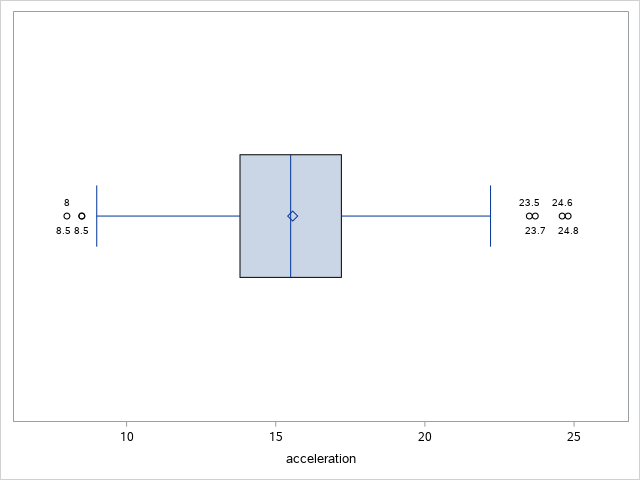

In [13]:
*Check outliers using box plot;
proc sgplot data= auto.updated;
hbox acceleration /datalabel;
run;


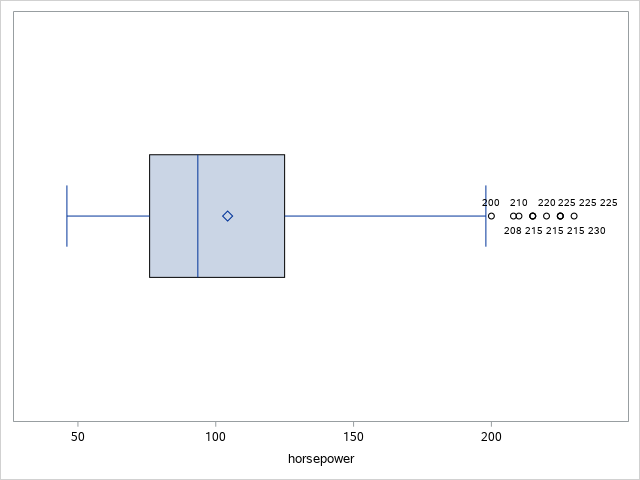

In [14]:
proc sgplot data= auto.updated;
hbox horsepower /datalabel;
run;


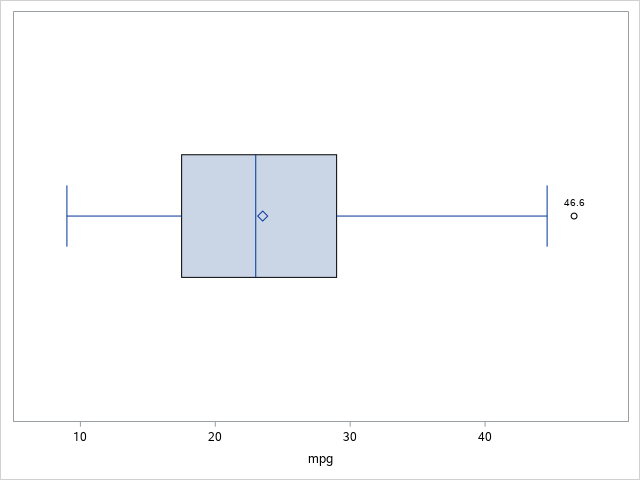

In [15]:
proc sgplot data= auto.updated;
hbox mpg /datalabel;
run;


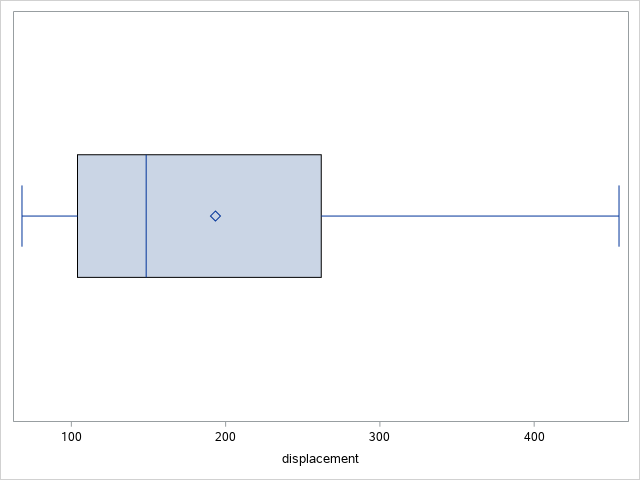

In [16]:
proc sgplot data= auto.updated;
hbox displacement /datalabel;
run;


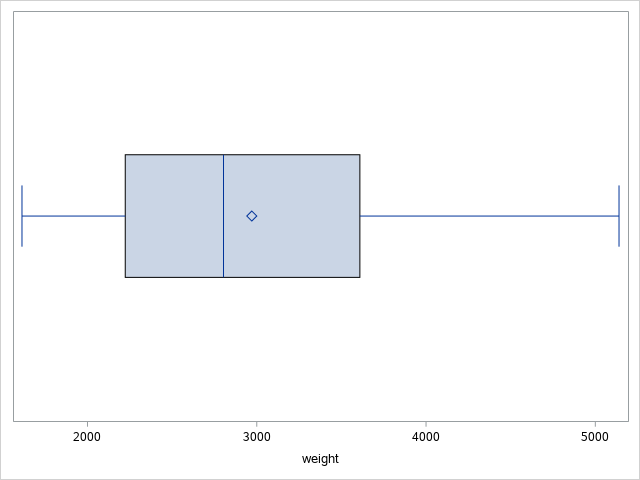

In [17]:
proc sgplot data= auto.updated;
hbox weight /datalabel;
run;

## Handle Outliers

In [18]:
*Pending;

## Check for Normal Distribution of Variables


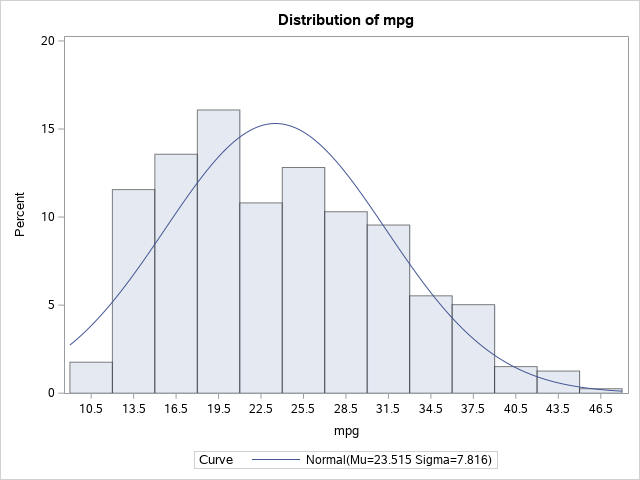
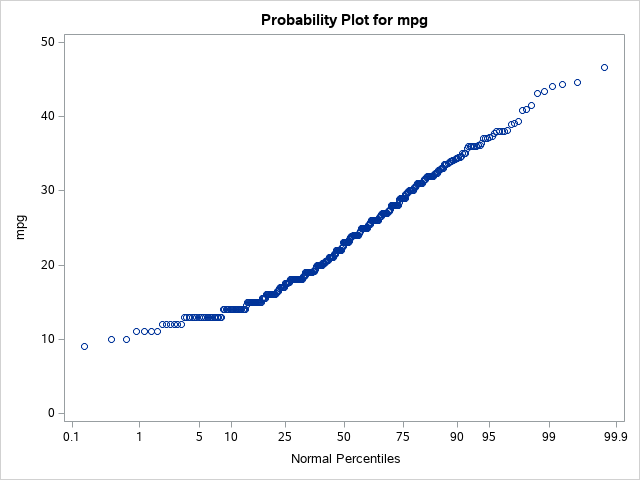
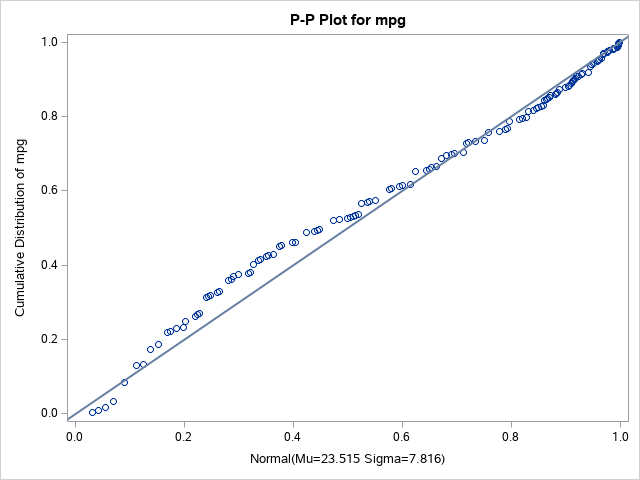
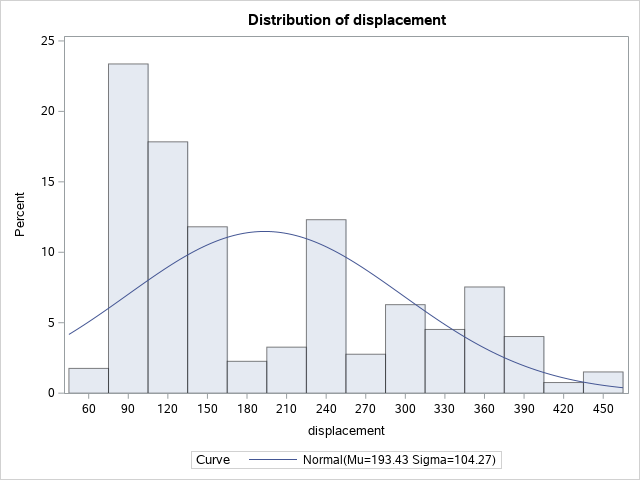
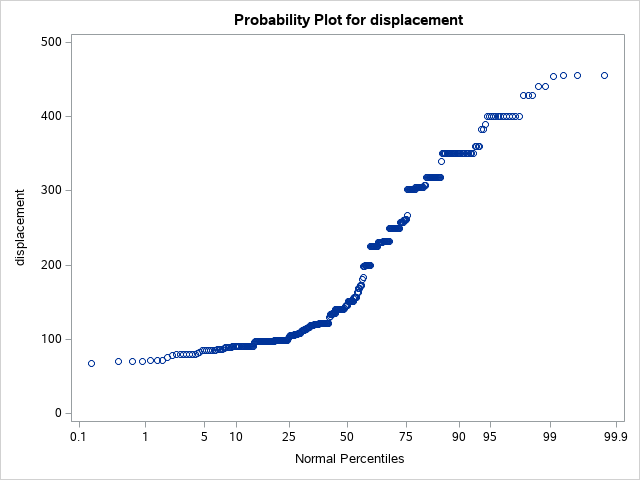
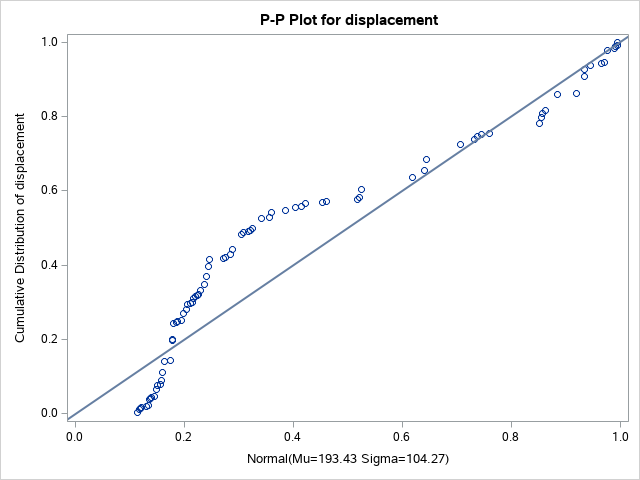
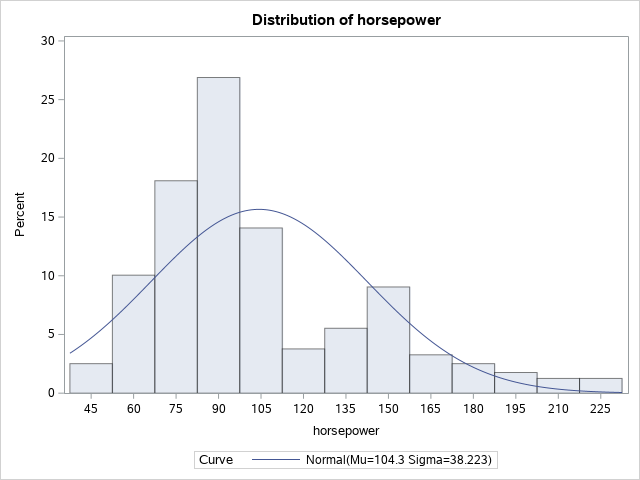
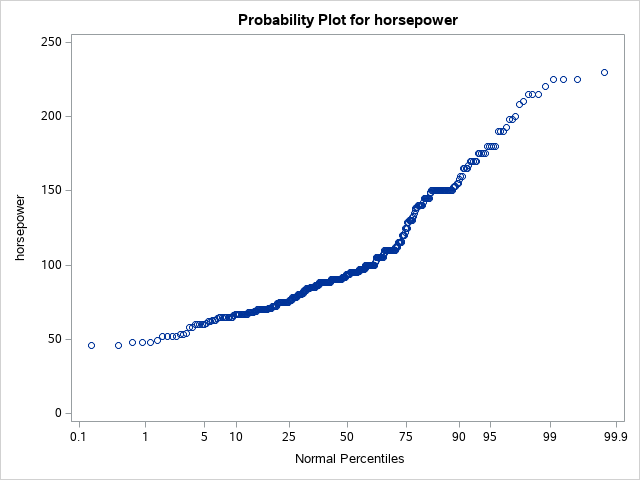
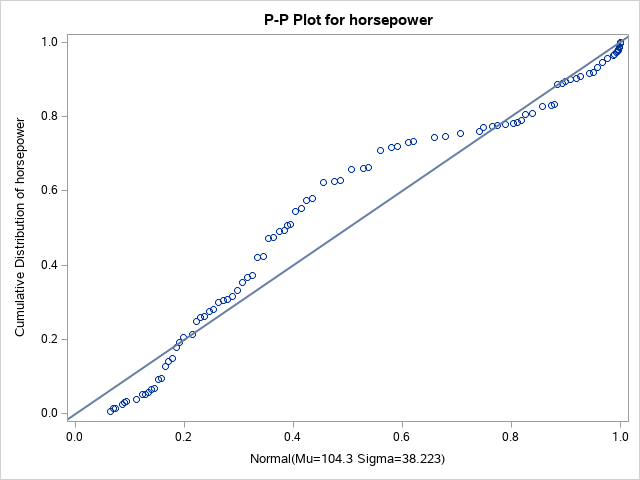
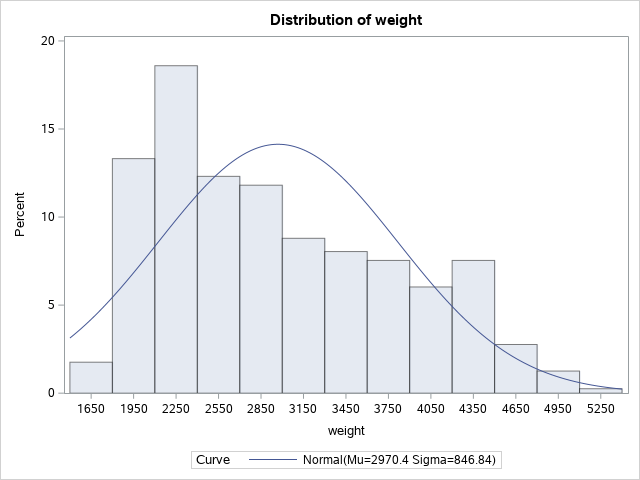
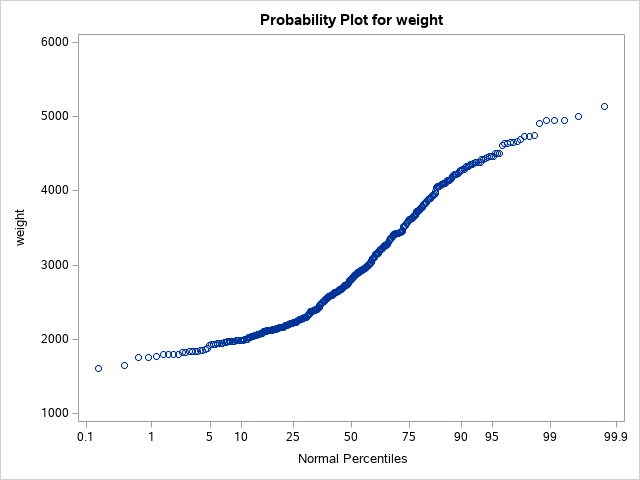
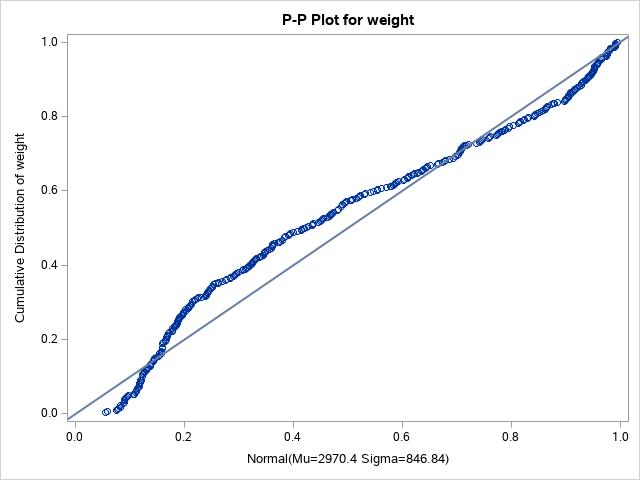
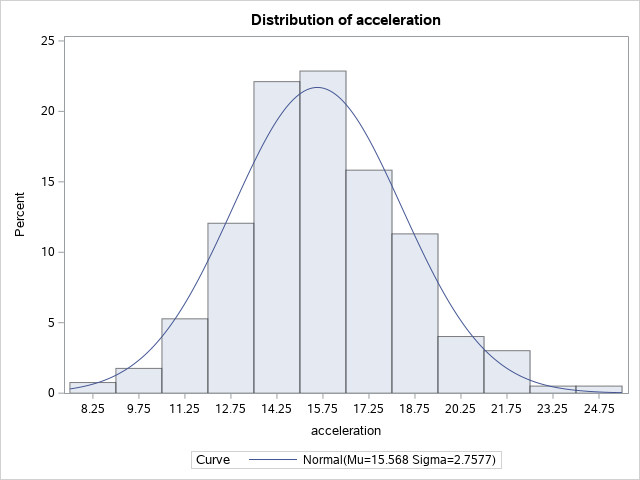
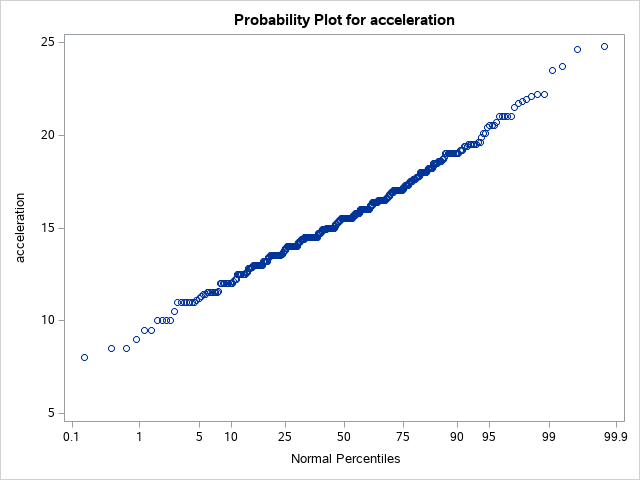
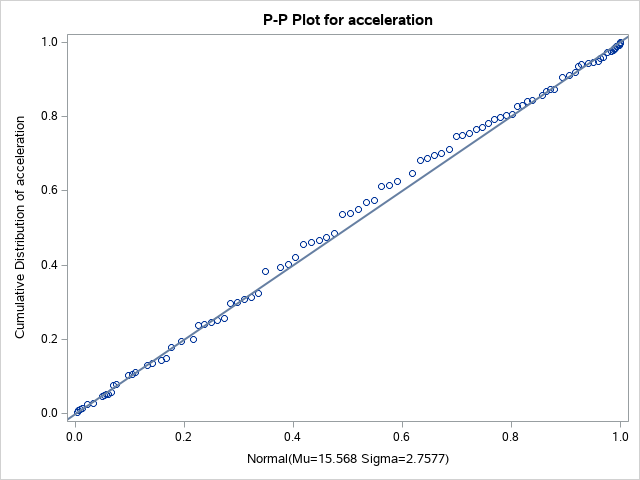

In [19]:
*Check Q-Q and probability plots for checking distribution of variables;
proc univariate data=auto.updated;
var mpg displacement horsepower weight acceleration;
ppplot;
histogram/normal;
probplot/normal;
run;

## Check Correlation between Variables

In [20]:
*Check pearson correlation for linear and spearman correlation for non linear variables;
proc corr data=auto.updated pearson spearman plots=matrix(nvar=all histogram);
run;


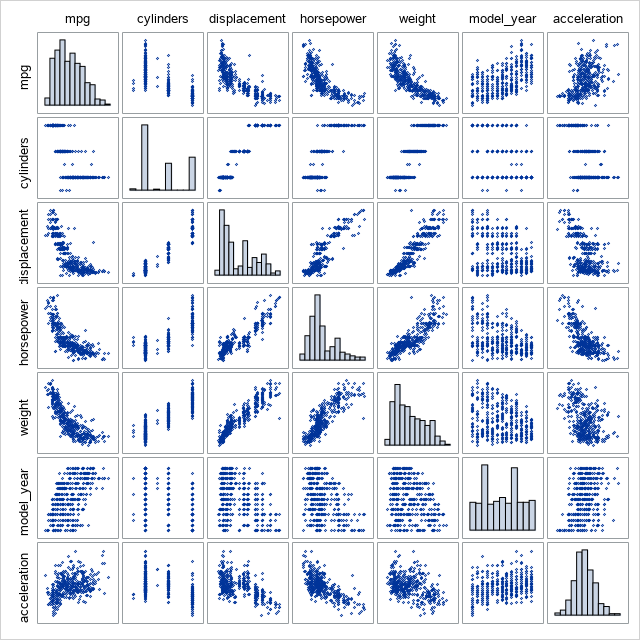

In [21]:
* Plot scatter plots to visualize the relation between varibles;
proc sgscatter data=auto.updated;
    matrix mpg cylinders displacement horsepower weight model_year acceleration/ diagonal=(histogram);
run;

## Feature Construction: Extracting name of the brand

In [ ]:
list_brand=[]
for i in range(398):
    list_brand.append(df['car name'][i].split(" ")[0])

df['brand']=list_brand
df['brand'].unique()


# some of the names as written in short so converitng it to a common name for each

df['brand'] = df['brand'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
df['brand'] = df['brand'].replace('maxda','mazda')
df['brand'] = df['brand'].replace('toyouta','toyota')
df['brand'] = df['brand'].replace('mercedes-benz','mercedes')
df['brand'] = df['brand'].replace('nissan','datsun')
df['brand'] = df['brand'].replace('capri','ford')
df['brand'] = df['brand'].replace(['chevroelt','chevy'],'chevrolet')

df['brand'].value_counts()